# TP5 - Inferencia Bayesiana

TO DO:

3. Prediccion
Prediga, para ambos priors, el resultado de una nueva tirada de moneda. Algo hice pero no me quedan muy claros los resultados

5. Prior 
Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros de su prior Beta.

PROBLEMAS:
    - Por alguna razón no me deja usar pm.beta(100,100)
    - No entiendo bien que piden en el punto 3, ¿predicción en que sentido? predecir qué va a salir en la próxima tirada de la moneda entiendo



In [72]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pymc3 import traceplot
import seaborn as sns

In [54]:
def correr_modelo(tiradas, caras, iteraciones, alpha, beta):
    modelo = pm.Model()
    with modelo:
        theta = pm.Beta('theta', alpha, beta) #prior de beta(1,1)
        caras = pm.Binomial('caras', n=tiradas, p=theta, observed=caras)
        trace = pm.sample(iteraciones)
    return trace, modelo

## 1. Implementacion
Implemente el modelo en pymc3 para los priors Beta(1,1) y Beta(100,100), y grafique las posteriors resultantes de observar 6 caras de 6 tiradas.

In [57]:
trace, modelo = correr_modelo(tiradas=6, caras=6, iteraciones=2000, alpha=1, beta=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 92%|█████████▏| 2289/2500 [00:00<00:00, 2854.90it/s]/home/laura/.local/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.881174725997, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 2500/2500 [00:00<00:00, 2860.50it/s]


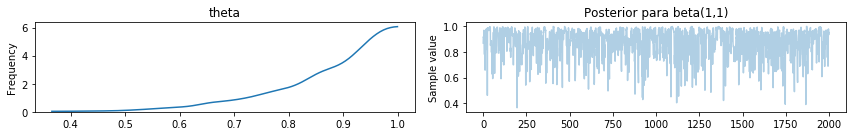

In [70]:
pm.traceplot(trace)
plt.title("Posterior para beta(1,1)")
plt.show()

In [59]:
trace2, modelo2 = correr_modelo(tiradas=6, caras=6, iteraciones=2000, alpha=60, beta=60)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:00<00:00, 2911.10it/s]


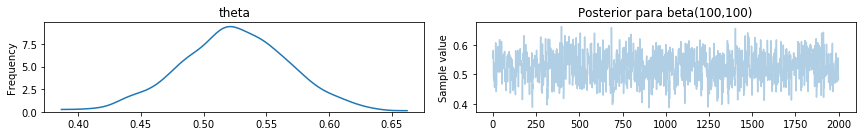

In [60]:
pm.traceplot(trace2)
#pm.plot_posterior(trace2)
plt.title("Posterior para beta(100,100)")
plt.show()

## 2. Resúmenes

Calcule el MAP (maximo a posteriori) y las medias de ambas posteriors.

### Posterior Nº1  - Beta(1,1)

In [64]:
MAP_1 = pm.find_MAP(model=modelo)
print("MAP Posterior Nº1: " + str(MAP_1))

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 4652.84it/s]  

MAP Posterior Nº1: {'theta_logodds__': array(13.385080233683778), 'theta': array(0.9999984620831801)}


In [66]:
pm.summary(trace)


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.874            0.111            0.004            [0.649, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.591          0.820          0.905          0.960          0.995



### Posterior Nº2 - Beta(100,100)

In [67]:
MAP_2 = pm.find_MAP(model=modelo2)
print("MAP Posterior Nº1: " + str(MAP_2))

logp = -1.993, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 3455.89it/s]

MAP Posterior Nº1: {'theta_logodds__': array(0.09684982578846833), 'theta': array(0.5241935483368524)}


In [68]:
pm.summary(trace2)


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.524            0.043            0.001            [0.439, 0.611]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.437          0.496          0.525          0.553          0.610



## 3. Predicción
Prediga, para ambos priors, el resultado de una nueva tirada de moneda.

### Posterior Nº1  - Beta(1,1)

100%|██████████| 500/500 [00:00<00:00, 8299.96it/s]


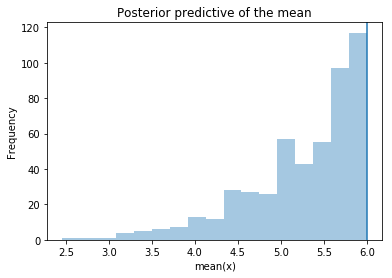

In [84]:
ppc1 = pm.sample_ppc(trace, samples=500, model=modelo, size=100)

ax = plt.subplot()
sns.distplot([n.mean() for n in ppc1['caras']], kde=False, ax=ax)
ax.axvline(6)
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');
plt.show()

### Posterior Nº2  - Beta(100,100)

100%|██████████| 500/500 [00:00<00:00, 7745.60it/s]


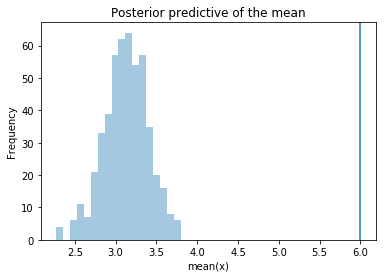

In [83]:
ppc2 = pm.sample_ppc(trace2, samples=500, model=modelo2, size=100)

ax = plt.subplot()
sns.distplot([n.mean() for n in ppc2['caras']], kde=False, ax=ax)
ax.axvline(6)
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');
plt.show()

## 4. Otros datos

Repita los puntos anteriores para una situacion en la que se observan 20 caras de 20 tiradas, y otra en la que se observan 3 caras de 3 tiradas. ¿Que puede concluir de los priors elegidos? ¿Y del modelo en general?

### 20 caras de 20 tiradas

#### Prior Nº1

In [85]:
trace3, modelo3 = correr_modelo(tiradas=20, caras=20, iteraciones=2000, alpha=1, beta=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 93%|█████████▎| 2323/2500 [00:00<00:00, 2897.02it/s]/home/laura/.local/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 2500/2500 [00:00<00:00, 2912.32it/s]


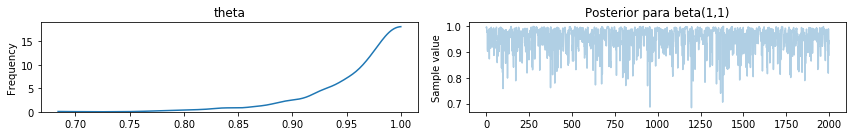

In [86]:
pm.traceplot(trace3)
plt.title("Posterior para beta(1,1)")
plt.show()

#### Prior Nº2

In [90]:
trace4, modelo4 = correr_modelo(tiradas=20, caras=20, iteraciones=2000, alpha=60, beta=60)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 4000/4000 [00:01<00:00, 3156.36it/s]


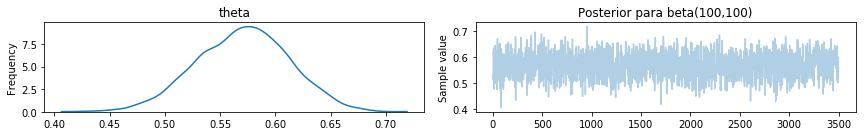

In [91]:
pm.traceplot(trace4)
plt.title("Posterior para beta(100,100)")
plt.show()

El posterior resulta sesgado hacia la derecha cuando se tira 20 veces y se obtienen 20 caras, con ambos priors. Esto nos indica que cuando la cantidad de datos aumenta, el prior influye menos en el resultado.

### 3 caras de 3 tiradas

#### Prior Nº1

In [92]:
trace5, modelo5 = correr_modelo(tiradas=3, caras=3, iteraciones=2000, alpha=1, beta=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:00<00:00, 2989.96it/s]


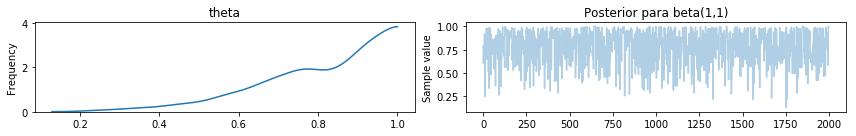

In [96]:
pm.traceplot(trace5)
plt.title("Posterior para beta(1,1)")
plt.show()

#### Prior Nº2

In [94]:
trace6, modelo6 = correr_modelo(tiradas=3, caras=3, iteraciones=2000, alpha=60, beta=60)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:00<00:00, 2983.05it/s]


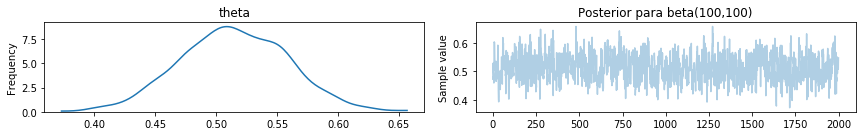

In [97]:
pm.traceplot(trace6)
plt.title("Posterior para beta(100,100)")
plt.show()

## 5. Prior
Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar
que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros
de su prior Beta.